### 1. Importing Libraries

In [10]:
# 'os' module provides functions for interacting with the operating system
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Importing and Exploration of the dataset

In [11]:
# loading the data and setting the unique client_id as the index::

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn.csv')

In [12]:
# # showing the first 5 rows of the dataset:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
# To check the Dimensions of the dataset:
df.shape

(3333, 21)

In [14]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

### 3. Checking the datatypes of the columns

In [15]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type

In [17]:
# loan_id:

df['State'] = df['State'].astype('object')

# repaid:

# df['repaid'] = df['repaid'].astype('category')

#### Checking the datatypes again:

In [ ]:
df.dtypes

In [ ]:
# Remove correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Day charge', 'Eve charge', 'Night charge','Intl charge']

use_cols   = [x for x in df.columns if x not in col_to_drop]

#removing the State column
telcom = df[use_cols]

cat_cols   = list(set(telcom.nunique()[telcom.nunique() < 6].keys().tolist() + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col]

### 5. Summary Statistics of the data

In [18]:
# Summary Statistics for Numerical data:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False.
freq,106,1,3010,2411,2850


### 6. Missing Values

In [20]:
# use isnull().sum() to check for missing values
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

There are no missing values in the data.

Sk-learn library has an in-built function called Iterative Imputer to impute the missing values. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

----------------

### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

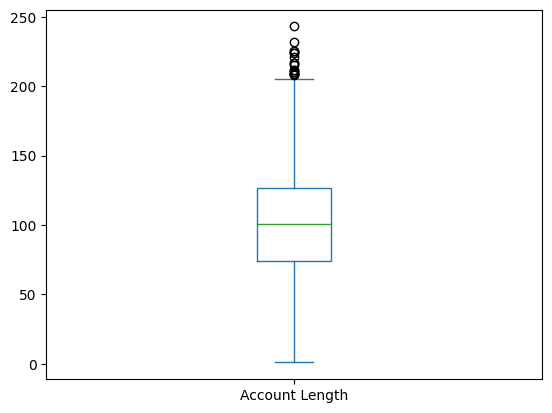

In [21]:
# For loan_amount
df['Account Length'].plot(kind='box')
plt.show()

In [ ]:
# For rate
df['VMail Message'].plot(kind='box')
plt.show()

We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here.

### 8. Transformation

### 8a. SQRT transformation

In [ ]:
df['SQRT_RATE'] = df['rate']**0.5

In [ ]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [ ]:
df.head()

In [ ]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

In [ ]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()


### Result:

The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.

### 8b. Log Transformation

In [ ]:
df['Log Rate'] = np.log(df['rate'])

In [ ]:
df.head()

In [ ]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log Rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['Log Rate'].kurt()))

In [ ]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

### Inference:

Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable.

In [ ]:
## Using Lambda function :

df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [ ]:
df.head()

There are other transformations available also called BoxCox. There is an inbuilt function in Sci-kit Learn library called PowerTransformer for this which can also be called to transform the data. We'll see how it works below. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html


-----------

### Outliers Treatment using Capping Approach

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [ ]:
# loading the dataset and setting client id as index

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn.csv')
df1.head()

In [ ]:
# loan_id:

df1['loan_id'] = df1['loan_id'].astype('object')

# repaid:

df1['repaid'] = df1['repaid'].astype('category')

In [ ]:
# loan_start:

df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')


# loan_end:

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [ ]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

#### Using SciPy Library to calculate the Z-Score:

In [ ]:
# Creating new variable with Z-score of each record:
df1['ZR'] = stats.zscore(df1['rate'])

In [ ]:
df1.head()

In [ ]:
# Combined Lower limit and Upper limit:

df1[(df1['ZR']<-3) | (df1['ZR']>3)]

In [ ]:
# count of outliers:

df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

In [ ]:
### Cleaned Data: without outliers so z>-3 and z< +3

df2= df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

In [ ]:
df1.shape

In [ ]:
df2.shape

#### Interpretation:

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

-----------

### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.

In [ ]:
# finding the Quantiles:

Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

In [ ]:
## Plot

sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [ ]:
# Find count of Outliers wrt IQR

df3[(df3.rate<LC) | (df3.rate>UC)].reset_index(drop=True)

In [ ]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

In [ ]:
## Store the clean data wrt IQR:

df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

In [ ]:
df3.shape

In [ ]:
df4.shape

#### Interpretation:

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [ ]:
## Box Plot for rate--- based on IQR Method

sns.boxplot(df1.rate)
plt.show()

In [ ]:
# Box Plot for rate --- based on Z-score cleaned data

sns.boxplot(df2.rate)
plt.show()

In [ ]:
# Box Plot for rate --- based on IQR cleaned data

sns.boxplot(df4.rate)
plt.show()

-------------------

### 9. Scaling the Numerical Features

There are two ways to scale the data:

1) Standardization (Z-Score)\
2) Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.

### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:

In [ ]:
# for Rate :
avg_rate = df3['rate'].mean()
avg_rate

In [ ]:
std_rate = df3['rate'].std()
std_rate

In [ ]:
# Step 1 : transform using Z-score
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [ ]:
df3.head()

In [ ]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df3.rate.skew()))
print("The kurtosis for the original data is {}.".format(df3.rate.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))

In [ ]:
# For Loan_amount:
avg_LA = df3['loan_amount'].mean()
avg_LA

In [ ]:
std_LA = df3['loan_amount'].std()
std_LA

In [ ]:
# Step 1 : transform using Z-score
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [ ]:
df3.head()

In [ ]:
# checking if the skewness and kurtosis post scaling or not:

# For Loan_amount:

print("The skewness for the original data is {}.".format(df3.loan_amount.skew()))
print("The kurtosis for the original data is {}.".format(df3.loan_amount.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))

In [ ]:
# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])


plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is:
Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1) Comparison between variables is easier\
2) Computation power is more efficient and less time consuming.

#### By SkLearn:

Documentation for Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# Loans data:

df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

In [ ]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

### 6b.  Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:

In [ ]:
# ForeRate:
min_rate = df4.rate.min()
min_rate

In [ ]:
max_rate = df4.rate.max()
max_rate

In [ ]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/ (max_rate - min_rate)

In [ ]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.rate.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.rate.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.kurt()))

In [ ]:
# Distribution of the columns

# For Rate

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
# For Loan_amount:
min_LA = df4.loan_amount.min()
min_LA

In [ ]:
max_LA = df4.loan_amount.max()
max_LA

In [ ]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/ (max_LA - min_LA)

In [ ]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.loan_amount.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.loan_amount.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.kurt()))

In [ ]:
# Distribution of the columns

# For Loan_Amount

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

#### By Sklearn:

Documentation for Min Max Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

### Few things to keep in mind:

With Scaling all three - Skewness, Kurtosis and distribution remain same so there is no impact on outliers as well.

------------------

### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using:

1) pd.get_dummies\
2) sklearn's in-built function of OneHotEncoder and LabelEncoder

In [ ]:
# Loans data:

df_loans = df3.copy()

In [ ]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [ ]:
df_loans.head()

In [ ]:
df_loans.dtypes

In [ ]:
# Repaid is also a categoriy columns and creating dummies for loan_type
df_loans.repaid.head()

### 1) pd.get_dummies approach:

In [ ]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

### 2. OneHot Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OE_tips = OneHotEncoder(drop ='first').fit(df_loans[['loan_type']])
OE_tips.categories_

### 3. Label Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

LE_tips = LE.fit(df_loans[['loan_type']])

In [ ]:
LE_tips.classes_

In [ ]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

In [ ]:
# Inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

----------------

### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan

In [ ]:
import datetime as dt

In [ ]:
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']

In [ ]:
df_loans.head()

In [ ]:
df_loans.dtypes

The number of days in the tenure are currently in TimeDelta, we want it integer hence will do the conversion as follows:

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

In [ ]:
## Tenure in number of Years:

df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

### 12. Training and Testing data

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Splitting for X and Y variables:

Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [ ]:
# Independent Variable

X.head()

In [ ]:
# Dependent or Target Variable

Y.head()

In [ ]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

To statistically test if the train and test representative of the overall data, would compute the Median for the independent variables for both the test and train sets.

In [ ]:
# median for y_train
median_y_train = Y_train.median()

# median for y_test
median_y_test = Y_test.median()

In [ ]:
print('The median for Y Train variables is:',median_y_train)

In [ ]:
print('The median for Y Test variables is:',median_y_test)

### Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both y_train and y_test are similar.

-----------------